# Exercise 5.4

In [1]:
import pathlib
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_data() -> pd.DataFrame:
    """
    Load the sweat data from Example 5.2.
    """
    keep_cols = ['Sweat Rate', 'Sodium', 'Potassium']
    sweat_pth = pathlib.Path('..\..\data\Table5.1.xlsx')
    return pd.read_excel(sweat_pth)[keep_cols]

In [3]:
sweat_df = load_data()
sweat_df.head(3)

,Sweat Rate,Sodium,Potassium
0,3.7,48.5,9.3
1,5.7,65.1,8.0
2,3.8,47.2,10.9


## (a)

In [4]:
X = sweat_df.to_numpy()
n, p = X.shape

In [5]:
xbar = np.mean(X, axis=0).reshape(p,1)
S = np.cov(X.T)

In [6]:
xbar

array([[ 4.64 ],
       [45.4  ],
       [ 9.965]])

In [7]:
S

array([[  2.87936842,  10.01      ,  -1.80905263],
       [ 10.01      , 199.78842105,  -5.64      ],
       [ -1.80905263,  -5.64      ,   3.62765789]])

In [8]:
np.linalg.inv(S)

array([[ 0.58615531, -0.02208572,  0.25796874],
       [-0.02208572,  0.00606723, -0.00158093],
       [ 0.25796874, -0.00158093,  0.40184677]])

In [9]:
lmbda, e = np.linalg.eig(S)

In [10]:
lmbda

array([200.46246446,   1.30139237,   4.53159053])

In [11]:
e

array([[-0.05084144, -0.81748351, -0.57370364],
       [-0.99828352,  0.02487655,  0.05302042],
       [ 0.02907156, -0.57541452,  0.81734508]])

In [12]:
alpha = 0.10
f_crit = scipy.stats.f.ppf(1-alpha, dfn=p, dfd=n-p)

In [13]:
# The half length in the direction of major axis.
np.sqrt(lmbda.max()*(((n-1)*p)/(n*(n-p)))*f_crit)

9.050674095895781

In [14]:
# The half length in the direction of minor axis.
np.sqrt(lmbda.min()*(((n-1)*p)/(n*(n-p)))*f_crit)

0.7292367091847589

## (b)

### Q-Q Plots

In [15]:
def my_q_q_plot(x: np.ndarray):
    x = x.copy()
    assert len(x.shape) == 1, "Wrong shape."
    x.sort()
    prob = (np.arange(x.size)+1 - 0.5) / n
    quant = scipy.stats.norm.ppf(prob)

    return plt.scatter(quant, x)


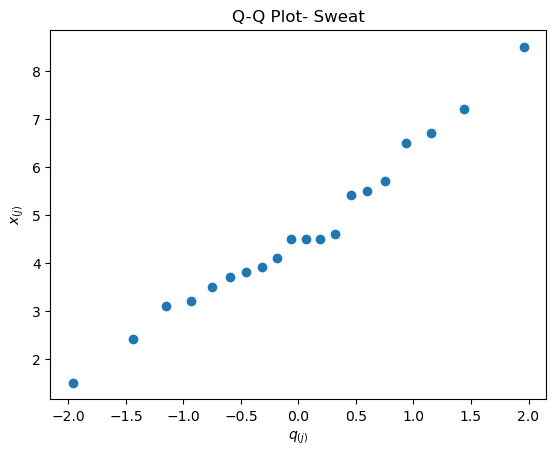

In [16]:
# Sweat
sweat_a = X[:, 0].copy()
my_q_q_plot(sweat_a)
ax = plt.gca()
plt.title('Q-Q Plot- Sweat')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Exercise-5-4-QQ-Sweat.png')
plt.show()

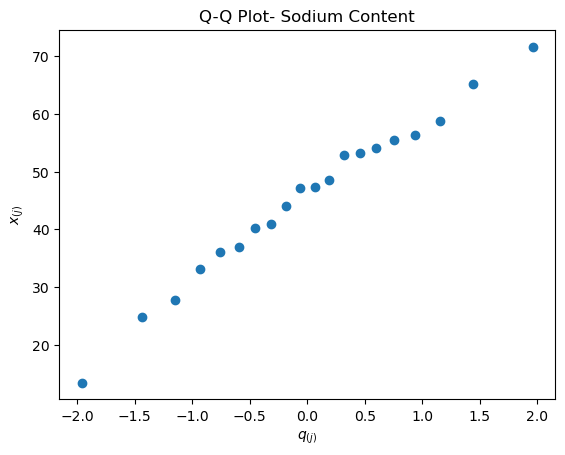

In [17]:
sodium_a = X[:, 1].copy()
my_q_q_plot(sodium_a)
ax = plt.gca()
plt.title('Q-Q Plot- Sodium Content')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Exercise-5-4-QQ-Sodium.png')
plt.show()

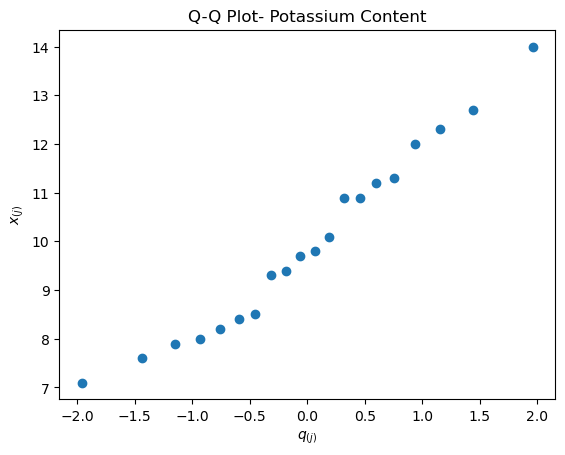

In [18]:
potassium_a = X[:, 2].copy()
my_q_q_plot(potassium_a)
plt.title('Q-Q Plot- Potassium Content')
plt.xlabel('$q_{(j)}$')
plt.ylabel('$x_{(j)}$')
plt.savefig('Exercise-5-4-QQ-Potassium.png')
plt.show()

### Scatter Plots

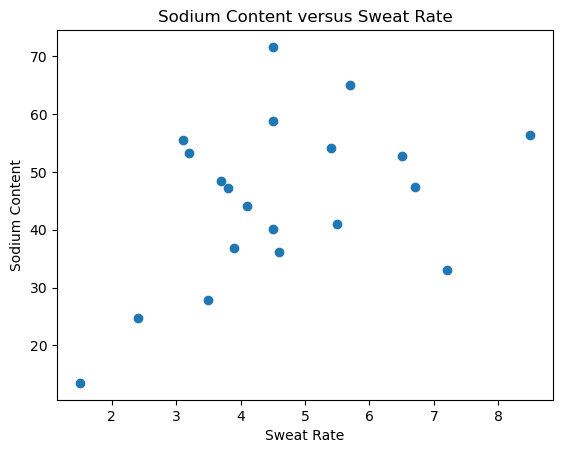

In [19]:
plt.figure()
plt.scatter(sweat_df['Sweat Rate'], sweat_df['Sodium'])
plt.title('Sodium Content versus Sweat Rate')
plt.xlabel('Sweat Rate')
plt.ylabel('Sodium Content')
plt.savefig('Exercise-5-4-Sweat-vs-Sodium.png')
plt.show()

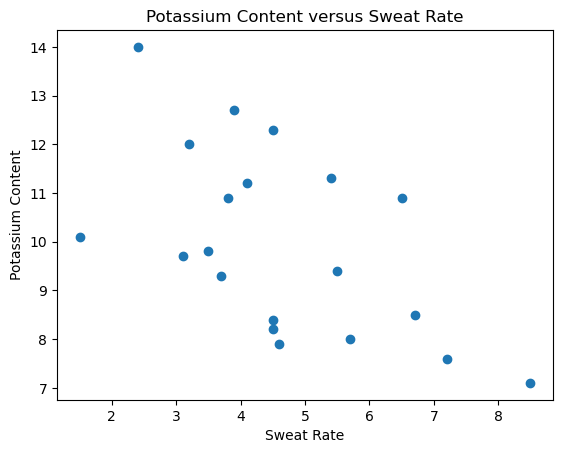

In [20]:
plt.figure()
plt.scatter(sweat_df['Sweat Rate'], sweat_df['Potassium'])
plt.title('Potassium Content versus Sweat Rate')
plt.xlabel('Sweat Rate')
plt.ylabel('Potassium Content')
plt.savefig('Exercise-5-4-Sweat-vs-Potassium.png')
plt.show()

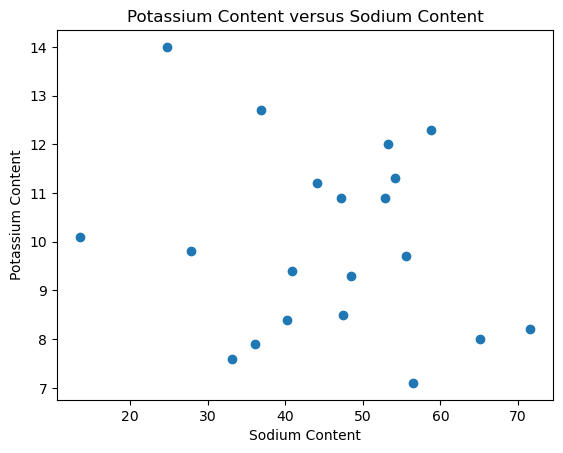

In [21]:
plt.figure()
plt.scatter(sweat_df['Sodium'], sweat_df['Potassium'])
plt.title('Potassium Content versus Sodium Content')
plt.xlabel('Sodium Content')
plt.ylabel('Potassium Content')
plt.savefig('Exercise-5-4-Sodium-vs-Potassium.png')
plt.show()